###Bounty Tennis

We consider three different hypothesis, which we try to show using our data.

#####"Bad Luck Brian"
It has been said that in Tennis, it does not matter the total points you score, but rather what matters is when those points are scored. A player may lose the game, inspite of scoring more than his opponent. This is shown using our data, by showing the list of cases where it occurred, and then we show the most unlucky rounds for players, where such scenarios are most likely to occur.

#####"Early Bird Advantage"
The next hypothesis deals with an "Early Bird" advantage, where we try to show whether a player having more number of aces or more number of first serve points (i.e. points scored early on) is more likely to win the game, or whether the opposite is true.

#####"What's in a Name?"
In our final hypothesis, we deal with a rather unconventional idea. Growing up in India, around 'Sadhu babas' and such, we all have come accross instances where people change their name in order to change their luck. We see whether the names of players has any impact on the outcome of a match or not.

In [8]:
# Importing the necessary libraries required
import pandas as pd
import matplotlib
pd.options.display.mpl_style = 'default'

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline  

In [9]:
# Reading each of our dataset into the notebook

ausOpenMen = pd.read_csv('AusOpen-men-2013.csv')
ausOpenWomen = pd.read_csv('AusOpen-women-2013.csv')
frenchOpenMen = pd.read_csv('FrenchOpen-men-2013.csv')
frenchOpenWomen = pd.read_csv('FrenchOpen-women-2013.csv')
usOpenMen = pd.read_csv('USOpen-men-2013.csv')
usOpenWomen = pd.read_csv('USOpen-women-2013.csv')
wimbledonMen = pd.read_csv('Wimbledon-men-2013.csv')
wimbledonWomen = pd.read_csv('Wimbledon-women-2013.csv')

In [112]:
# A function which we use to make a consistent database.
# We swap and replace some values, such that all throughout our database, 'Player1' represents the winner,
# 'Player2' represents the runner up, and all the values like '__.1' belong to the winner, i.e. Player1,
# and all values like '__.2' belong to the runner up, i.e. Player2.

# The replace(table) function takes in the table name, swaps the values in all those rows where Player2 is the winner, 
# and then returns the modified table

def replace(table):
    replaced = table
    idx = (replaced['Result']==0) # Result is 0 when Player2 is the winner
    # Swapping values and attributes of player1 and player2
    replaced.loc[idx,['Player1','Player2','FSP.1','FSP.2','ACE.1','ACE.2','WNR.1','WNR.2','BPC.1','BPC.2','NPA.1','NPA.2','TPW.1','TPW.2']] = replaced.loc[idx,['Player2','Player1','FSP.2','FSP.1','ACE.2','ACE.1','WNR.2','WNR.1','BPC.2','BPC.1','NPA.2','NPA.1','TPW.2','TPW.1']].values
    replaced.loc[idx,['FSW.1','FSW.2','SSP.1','SSP.2','SSW.1','SSW.2','DBF.1','DBF.2','UFE.1','UFE.2','BPW.1','BPW.2','NPW.1','NPW.2']] = replaced.loc[idx,['FSW.2','FSW.1','SSP.2','SSP.1','SSW.2','SSW.1','DBF.2','DBF.1','UFE.2','UFE.1','BPW.2','BPW.1','NPW.2','NPW.1']].values
    replaced.loc[idx,['ST1.1','ST1.2','ST2.1','ST2.2','ST3.1','ST3.2','ST4.1','ST4.2','ST5.1','ST5.2','FNL.1','FNL.2']] = replaced.loc[idx,['ST1.2','ST1.1','ST2.2','ST2.1','ST3.2','ST3.1','ST4.2','ST4.1','ST5.2','ST5.1','FNL.2','FNL.1']].values

    return replaced

In [113]:
# Replacing all the databases and making it a consistent one

replacedausOpenMen = replace(ausOpenMen)
replacedausOpenWomen = replace(ausOpenWomen)
replacedfrenchOpenMen = replace(frenchOpenMen)
replacedfrenchOpenWomen = replace(frenchOpenWomen)
replacedusOpenMen = replace(usOpenMen)
replacedusOpenWomen = replace(usOpenWomen)
replacedwimbledonMen = replace(wimbledonMen)
replacedwimbledonWomen = replace(wimbledonWomen)

In [114]:
# Results for Men

# Data set for Wimbledon doesn't have total points won value. Assumed here to be the sum of aces, winners,breakpoints and netpoints won.
replacedwimbledonMen['TPW.1'] = replacedwimbledonMen['ACE.1'] + replacedwimbledonMen['WNR.1'] + replacedwimbledonMen['BPW.1'] + replacedwimbledonMen['NPW.1']
replacedwimbledonMen['TPW.2'] = replacedwimbledonMen['ACE.2'] + replacedwimbledonMen['WNR.2'] + replacedwimbledonMen['BPW.2'] + replacedwimbledonMen['NPW.2']

badLuckMenW = replacedwimbledonMen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckMenF = replacedfrenchOpenMen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckMenU = replacedusOpenMen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckMenA = replacedausOpenMen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  

# Concatenating all four databases to calculate overall "unluckiness"
badLuckMen = pd.concat([badLuckMenW, badLuckMenA, badLuckMenU, badLuckMenF])
# The condition for unluckiness
badLuckMen = badLuckMen.loc[(badLuckMen['TPW.2'] > badLuckMen['TPW.1']) & (badLuckMen['ACE.2'] > badLuckMen['ACE.1']) & (badLuckMen['FSW.2'] > badLuckMen['FSW.1'])]
badLuckMen.columns = ['Runner-up','Winner','Round','Total points won by Runner-up','Total points won by Winner','Aces won by Runner Up','Aces won by Winner','First Serve Won by Runner-up','First Serve Won by Winner']
badLuckMen.sort_index(by=['Round'])

# The total data set, showing the runner up scoring more number of points, and yet losing the game.

,Runner-up,Winner,Round,Total points won by Runner-up,Total points won by Winner,Aces won by Runner Up,Aces won by Winner,First Serve Won by Runner-up,First Serve Won by Winner
0,A.Murray,B.Becker,1,71,51,11,5,39,29
16,Ivan Dodig,Fernando Verdasco,1,145,144,10,5,60,58
3,Dmitry Tursunov,Aljaz Bedene,1,121,97,16,13,52,41
114,Tommy Robredo,Roger Federer,1,110,101,6,5,61,38
0,Roger Federer,Pablo Carreno-Busta,1,88,50,10,1,33,27
4,Sam Querrey,Lukas Lacko,1,93,72,10,4,39,31
16,David Ferrer,Marinko Matosevic,1,98,76,3,1,33,29
20,Kevin Anderson,Illya Marchenko,1,115,89,13,0,50,39
21,Jarkko Nieminen,Lukasz Kubot,1,111,86,6,5,38,28
22,Michael Llodra,Steve Darcis,1,131,112,17,3,56,49


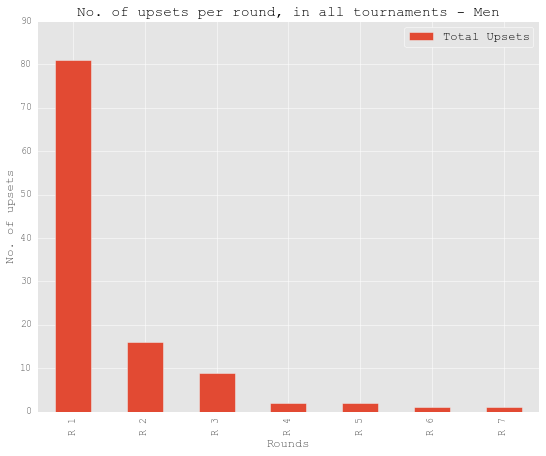

In [115]:
# To calculate which round was the most unlucky
exitList = []
for i in range(1,8):
    ct = len(badLuckMen[badLuckMen['Round'] == i].index)
    exitList.append(ct)
# To plot the result
df = pd.DataFrame(exitList,index=['R 1','R 2','R 3','R 4', 'R 5', 'R 6','R 7'],columns=['Total Upsets'])
ax = df.plot(kind='bar',figsize=(9,7),title="No. of upsets per round, in all tournaments - Men")
ax.set_xlabel('Rounds')
ax.set_ylabel('No. of upsets')

In [116]:
# Results for Women
# The calculation is similar to that of Men's.

# Data set for Wimbledon and US Open, Women doesn't have total points won value. Assumed here to be the sum of aces, winners,breakpoints and netpoints won.
replacedwimbledonWomen['TPW.1'] = replacedwimbledonWomen['ACE.1'] + replacedwimbledonWomen['WNR.1'] + replacedwimbledonWomen['BPW.1'] + replacedwimbledonWomen['NPW.1']
replacedwimbledonWomen['TPW.2'] = replacedwimbledonWomen['ACE.2'] + replacedwimbledonWomen['WNR.2'] + replacedwimbledonWomen['BPW.2'] + replacedwimbledonWomen['NPW.2']

replacedusOpenWomen['TPW.1'] = replacedusOpenWomen['ACE.1'] + replacedusOpenWomen['WNR.1'] + replacedusOpenWomen['BPW.1'] + replacedusOpenWomen['NPW.1']
replacedusOpenWomen['TPW.2'] = replacedusOpenWomen['ACE.2'] + replacedusOpenWomen['WNR.2'] + replacedusOpenWomen['BPW.2'] + replacedusOpenWomen['NPW.2']

badLuckWomenW = replacedwimbledonWomen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckWomenF = replacedfrenchOpenWomen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckWomenU = replacedusOpenWomen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  
badLuckWomenA = replacedausOpenWomen[['Player2','Player1','Round','TPW.2','TPW.1','ACE.2','ACE.1','FSW.2','FSW.1']]  

badLuckWomen = pd.concat([badLuckWomenW, badLuckWomenA, badLuckWomenU, badLuckWomenF])
badLuckWomen = badLuckWomen.loc[(badLuckWomen['TPW.2'] > badLuckWomen['TPW.1']) & (badLuckWomen['ACE.2'] > badLuckWomen['ACE.1']) & (badLuckWomen['FSW.2'] > badLuckWomen['FSW.1'])]
badLuckWomen.columns = ['Runner-up','Winner','Round','Total points won by Runner-up','Total points won by Winner','Aces won by Runner Up','Aces won by Winner','First Serve Won by Runner-up','First Serve Won by Winner']
badLuckWomen.sort_index(by=['Round'])



,Runner-up,Winner,Round,Total points won by Runner-up,Total points won by Winner,Aces won by Runner Up,Aces won by Winner,First Serve Won by Runner-up,First Serve Won by Winner
0,V.Azarenka,M.Koehler,1,38,26,3,2,31,21
18,Lucie Hradecka,Donna Vekic,1,58,37,9,1,23,17
23,Sabine Lisicki,Mirjana Lucic-Baroni,1,75,51,7,2,32,17
33,Ayumi Morita,Nadiya Kichenok,1,75,68,6,4,30,27
35,Magdalena Rybarikova,Andrea Petkovic,1,66,48,4,1,27,23
36,Marina Erakovic,Sorana Cirstea,1,83,78,6,5,35,25
38,Varvara Lepchenko,Lesia Tsurenko,1,93,92,3,1,42,35
39,Simona Halep,Katarzyna Piter,1,52,24,3,1,21,12
42,Stefanie Voegele,Kristina Mladenovic,1,76,61,7,3,32,29
47,Maria Sharapova,Bethanie Mattek-Sands,1,77,65,5,4,31,27


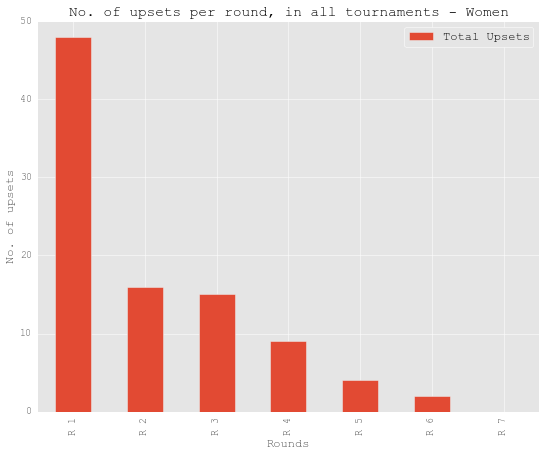

In [117]:
exitList = []
for i in range(1,8):
    ct = len(badLuckWomen[badLuckWomen['Round'] == i].index)
    exitList.append(ct)
df = pd.DataFrame(exitList,index=['R 1','R 2','R 3','R 4', 'R 5', 'R 6','R 7'],columns=['Total Upsets'])
ax = df.plot(kind='bar',figsize=(9,7),title="No. of upsets per round, in all tournaments - Women")
ax.set_xlabel('Rounds')
ax.set_ylabel('No. of upsets')

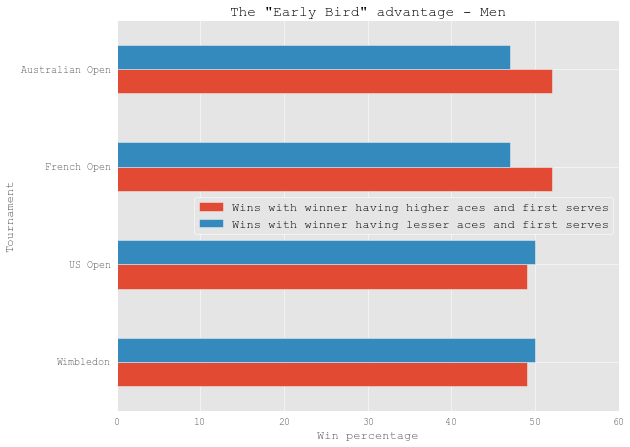

In [118]:
# Calculating for Men

# Reading each individual file
earlyMenW = replacedwimbledonMen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyMenU = replacedusOpenMen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyMenF = replacedfrenchOpenMen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyMenA = replacedausOpenMen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]

# Applying the condition
winCount = [] # stores count of games where players won, according to the hypothesis
lossCount = [] # stores count where playes lost according to the hypyothesis

table = earlyMenW
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyMenU
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyMenF
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyMenA
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

# Normalizing the result

for i in range(0,len(winCount)):
    x = float(winCount[i])
    y = float(lossCount[i])
    winCount[i] = int((x/(x+y))*100)
    lossCount[i] = int((y/(x+y))*100)

total = [winCount,lossCount]
total = [(winCount[i],lossCount[i]) for i in range(0,len(winCount)) ]
# Plotting
df = pd.DataFrame(total, columns = ['Wins with winner having higher aces and first serves','Wins with winner having lesser aces and first serves'],index=['Wimbledon','US Open','French Open','Australian Open'])
ax = df.plot(kind='barh',figsize=(9,7),title = 'The "Early Bird" advantage - Men');
ax.set_xlabel('Win percentage')
ax.set_ylabel('Tournament')

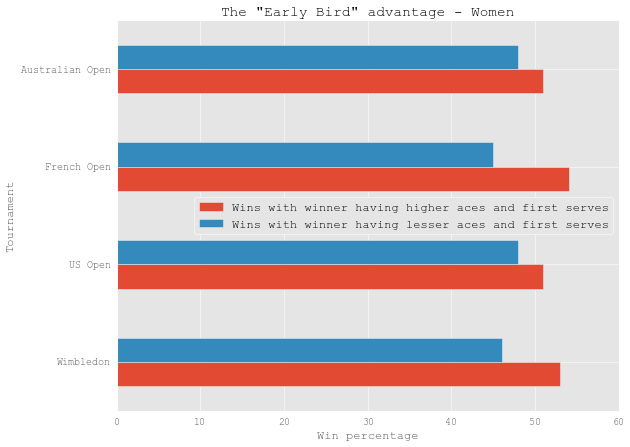

In [119]:
# Similar caclulations, same conclusion for Women.

earlyWomenW = replacedwimbledonWomen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyWomenU = replacedusOpenWomen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyWomenF = replacedfrenchOpenWomen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]
earlyWomenA = replacedausOpenWomen[['Player1','Player2','Result','ACE.1','ACE.2','FSW.1','FSW.2']]

winCount = []
lossCount = []
table = earlyWomenW
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyWomenU
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyWomenF
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )

table = earlyWomenA
winCount.append( (len((table[(table['ACE.1'] >= table['ACE.2']) | (table['FSW.1'] >= table['FSW.2']) ]).index)) )
lossCount.append( len((table[(table['ACE.1'] < table['ACE.2']) | (table['FSW.1'] < table['FSW.2']) ]).index) )
for i in range(0,len(winCount)):
    x = float(winCount[i])
    y = float(lossCount[i])
    winCount[i] = int((x/(x+y))*100)
    lossCount[i] = int((y/(x+y))*100)

total = [winCount,lossCount]
total = [(winCount[i],lossCount[i]) for i in range(0,len(winCount)) ]

df = pd.DataFrame(total, columns = ['Wins with winner having higher aces and first serves','Wins with winner having lesser aces and first serves'],index=['Wimbledon','US Open','French Open','Australian Open'])
ax = df.plot(kind='barh',figsize=(9,7),title = 'The "Early Bird" advantage - Women');
ax.set_xlabel('Win percentage')
ax.set_ylabel('Tournament')

In [122]:
# For calculating name frequency, we do not the consider the Wimbledon data sets, since it does not contain any information regarding first name
# Calculating for Men
total = pd.concat([replacedfrenchOpenMen, replacedausOpenMen, replacedusOpenMen])
total = total[['Player1']]
evenCountMen = 0
oddCountMen = 0
alphaCountMen = [0 for i in range(0,26)]
for x in total.iterrows():
    firstName = (str(x[1]).split())[1].split(' ')[0]
    first = firstName[0]
    if (ord(first) - ord('A')) % 2 == 0:
        evenCountMen += 1
    else:
        oddCountMen += 1
    alphaCountMen[ord(first) - ord('A')]+=1
sumMen = evenCountMen + oddCountMen
# Normalizing the frequency count
for i in range(0,len(alphaCountMen)):
    x = float(alphaCountMen[i])
    x = (x/sumMen)*100
    alphaCountMen[i] = int(x)

# Converting into percentage
oddCountMen = int((float(oddCountMen)/sumMen)*100)
evenCountMen = int((float(evenCountMen)/sumMen)*100)

# Calculating for Women
total = pd.concat([replacedfrenchOpenWomen, replacedausOpenWomen, replacedusOpenWomen])
total = total[['Player1']]
evenCountWomen = 0
oddCountWomen = 0
alphaCountWomen = [0 for i in range(0,26)]
for x in total.iterrows():
    firstName = (str(x[1]).split())[1].split(' ')[0]
    first = firstName[0]
    if (ord(first) - ord('A')) % 2 == 0:
        evenCountWomen += 1
    else:
        oddCountWomen += 1
    alphaCountWomen[ord(first) - ord('A')] += 1

# Converting into percentage
sumWomen = evenCountWomen + oddCountWomen
oddCountWomen = int((float(oddCountWomen)/sum)*100)
evenCountWomen = int((float(evenCountWomen)/sum)*100)

# Normalizing the frequency count
for i in range(0,len(alphaCountWomen)):
    x = float(alphaCountWomen[i])
    x = (x/sumWomen)*100
    alphaCountWomen[i] = int(x)

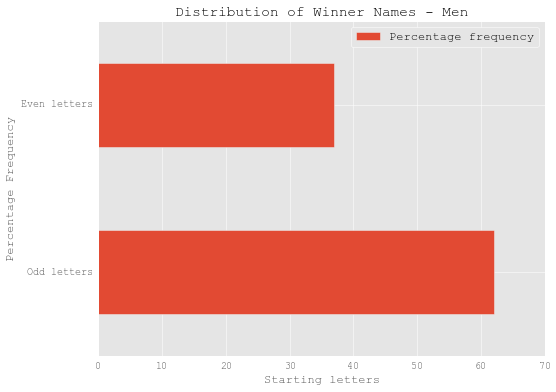

In [123]:
# Plotting overall names - Men
menNames = [oddCountMen, evenCountMen]
df = pd.DataFrame(menNames,index=['Odd letters','Even letters'],columns=['Percentage frequency'])
ax = df.plot(kind='barh',figsize=(8,6),title='Distribution of Winner Names - Men')
ax.set_ylabel('Percentage Frequency')
ax.set_xlabel('Starting letters')

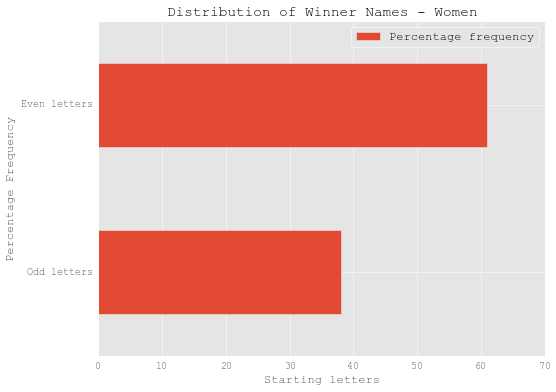

In [124]:
# Plotting overall names - Women
womenNames = [oddCountWomen, evenCountWomen]
df = pd.DataFrame(womenNames,index=['Odd letters','Even letters'],columns=['Percentage frequency'])
ax = df.plot(kind='barh',figsize=(8,6),title='Distribution of Winner Names - Women')
ax.set_ylabel('Percentage Frequency')
ax.set_xlabel('Starting letters')

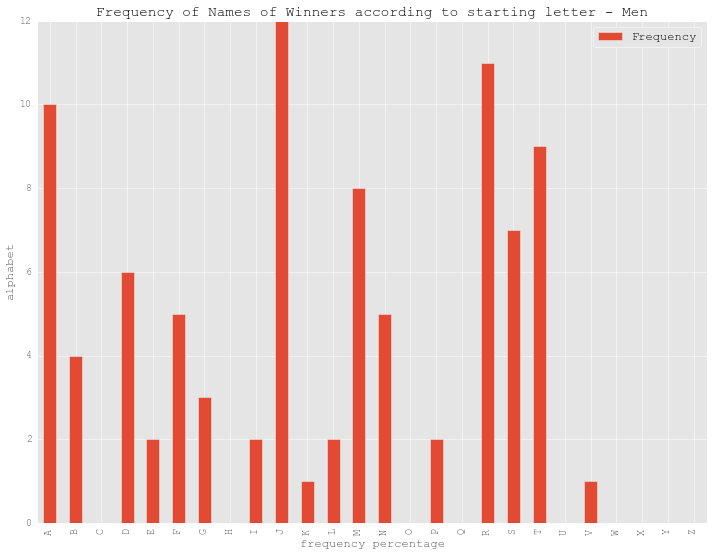

In [125]:
#Name frequency - Men
df = pd.DataFrame(alphaCountMen,columns=['Frequency'],index=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
ax = df.plot(kind='bar',figsize=(12,9),title = 'Frequency of Names of Winners according to starting letter - Men')
ax.set_ylabel('alphabet')
ax.set_xlabel('frequency percentage')

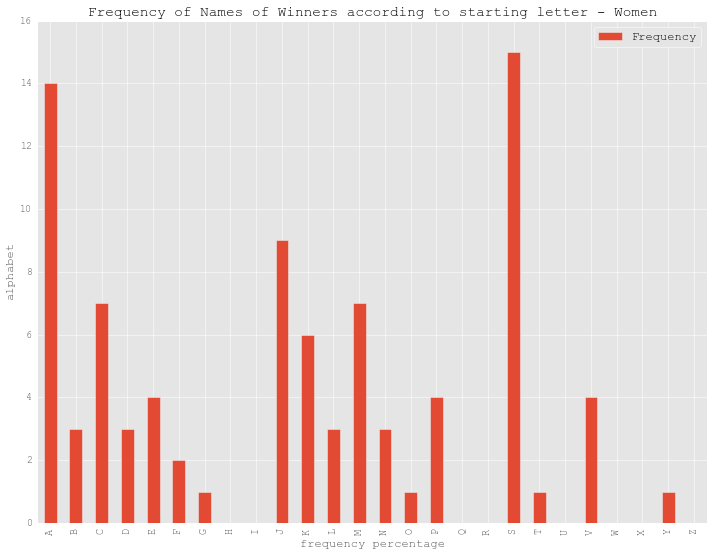

In [126]:
#Name frequency - Women
df = pd.DataFrame(alphaCountWomen,columns=['Frequency'],index=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
ax = df.plot(kind='bar',figsize=(12,9),title = 'Frequency of Names of Winners according to starting letter - Women')
ax.set_ylabel('alphabet')
ax.set_xlabel('frequency percentage')